# Valores propios, vectores propios y funciones propias

Un BVP interesante de analizar es aquel definido como la segunda derivada de una función $u(x)$ igual a un escalar $\lambda$.

\begin{align}
u_{xx} &= \lambda u \\
u(-1) &= u(1) = 0
\end{align}

La similitud con problemas de valores propios puede no ser evidente en principio. El operador Laplaciano unidimensional transforma la función $u$ y nos dice que dicha operación simplemente escala la función $u$, lo cual es el análogo en el contínuo para transformaciones realizadas por una matriz sobre un vector finito en nuestro problema clásico de valores propios $A\mathbf{v} =\lambda\mathbf{v} $.

Como hemos hecho en varios problemas de BVP abordamos con diferencias finitas centradas para el laplaciano.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
N = 400
xl, xr = -1, 1
h = (xr-xl)/(N+1)
D = (np.diag(-2*np.ones(N),0) + np.diag(np.ones(N-1),1) + np.diag(np.ones(N-1),-1))*(1/h**2)
Lam, V = np.linalg.eig(D)
ii = Lam.argsort()[::-1]
Lam = Lam[ii]
V = V[:,ii]

/usr/lib64/python3.4/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/usr/lib64/python3.4/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/usr/lib64/python3.4/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/usr/lib64/python3.4/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


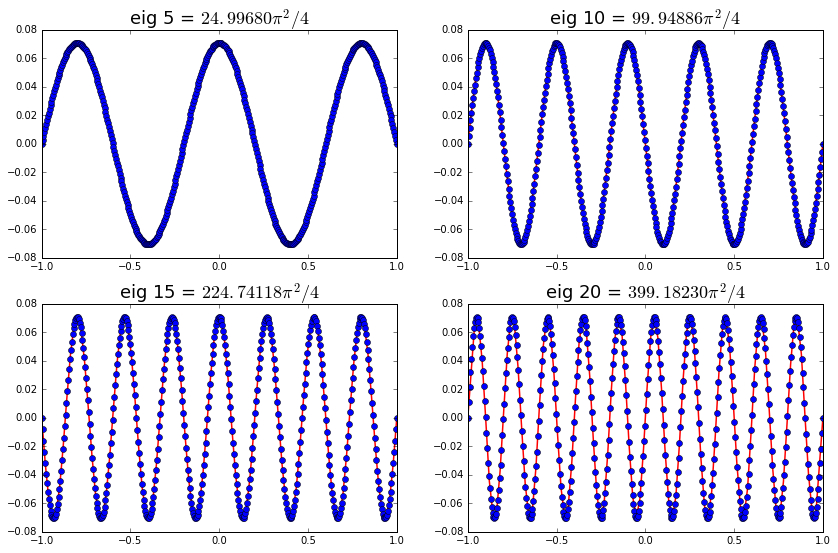

In [82]:
x = np.linspace(xl,xr,N+2)
xx = np.linspace(xl, xr, 100)
fig, axes = plt.subplots(2,2,figsize=(14,9))
axes[0,0].plot(xx, np.polyval(np.polyfit(x, np.concatenate([[0],V[:,4],[0]]), N), xx),'r-',lw=1.5)
axes[0,0].plot(x, np.concatenate([[0],V[:,4],[0]]),'o')
axes[0,0].set_title(r"eig 5 = $%.5f\pi^2/4$" % (-Lam[4]*4/np.pi**2), fontsize=18)

axes[0,1].plot(xx, np.polyval(np.polyfit(x, np.concatenate([[0],V[:,9],[0]]), N), xx),'r-',lw=1.5)
axes[0,1].plot(x, np.concatenate([[0],V[:,9],[0]]),'o')
axes[0,1].set_title(r"eig 10 = $%.5f\pi^2/4$" % (-Lam[9]*4/np.pi**2), fontsize=18)

axes[1,0].plot(xx, np.polyval(np.polyfit(x, np.concatenate([[0],V[:,14],[0]]), N), xx),'r-',lw=1.5)
axes[1,0].plot(x, np.concatenate([[0],V[:,14],[0]]),'o')
axes[1,0].set_title(r"eig 15 = $%.5f\pi^2/4$" % (-Lam[14]*4/np.pi**2), fontsize=18)

axes[1,1].plot(xx, np.polyval(np.polyfit(x, np.concatenate([[0],V[:,19],[0]]), N), xx),'r-',lw=1.5)
axes[1,1].plot(x, np.concatenate([[0],V[:,19],[0]]),'o')
axes[1,1].set_title(r"eig 20 = $%.5f\pi^2/4$" % (-Lam[19]*4/np.pi**2), fontsize=18)
plt.show()

La solución exacta para los valores propios es $\displaystyle \lambda_n = -n^2\pi^2/4,\;j=1,2\ldots$, y las autofunciones exactas son $\displaystyle \sin(n\pi(x+1)/2)$.

A medida que aumentemos el número de puntos $N$ para aproximar la solución al BVP, los vectores propios obtenidos van aproximando a las funciones propias descritas anteriormente. Notar que también aumentamos la precisión para la estimación de los valores propios.

## Preguntas interesantes

1. ¿Por qué no podemos analizar el problema como una resolución más de un BVP?
2. ¿Cómo podemos calcular soluciones no nulas de $u$?

## Disclaimer

El presente notebook ha sido creado para el curso ILI286 - Computación Científica 2, del Departamento de Informática, Universidad Técnica Federico Santa María. El material ha sido creado por Alejandro Sazo (asazo@alumnos.inf.utfsm.cl) y Claudio Torres (ctorres@inf.utfsm.cl), basado en *Spectral Methods in Matlab* de Lloyd N. Trefethen, programa 15. En caso de encontrar un error, por favor no dude en contactar al email especificado. Puede encontrar la última versión del código en https://github.com/asazo/CC2